In [1]:
from IPython.display import HTML
import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Python_modules.mmcomplexity as mmx

In [12]:
HTML(
    '''
    <script>
    code_show=true; 
    function code_toggle() {
     if (code_show){
     $('div.input').hide();
     } else {
     $('div.input').show();
     }
     code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <a href="javascript:code_toggle()">TOGGLE CODE ON/OFF</a>
    '''
)

## Audio 2AFC Change Point Task Simulations

In this notebook, we will simulate how the sound and the source location switches through the trials, dependent on the hazard rate.

In [13]:
%matplotlib inline

Now we will create a data set of trials, including source and sound swich information.

In [14]:
tot_trials, h_values, meta_k, meta_prior_h = 500, [.1, .9], .01, [.5, .5]
sim = mmx.Audio2AFCSimulation(tot_trials, h_values, meta_k, meta_prior_h)
observer = mmx.KnownHazard(sim)
observer.observe(sim['sound'])
print(f"observations: {observer.observations}")

TypeError: 'Audio2AFCSimulation' object is not subscriptable

In [16]:
pprint.pprint(sim.data.head())

  source  source_switch  sound  sound_switch  hazard  hazard_switch
0   left          False   left         False     0.1          False
1   left          False   left         False     0.1          False
2   left          False   left         False     0.1          False
3   left          False   left         False     0.1          False
4   left          False  right          True     0.1          False


In [13]:
observer.observe(sim['sound'])
print(f"observations: {observer.observations}")

TypeError: 'Audio2AFCSimulation' object is not subscriptable

Plotting the hazard rate switch per number of trials, sound switch over trials and source switch over the trials based on the dataset we have generated. 

Plotting hazard rate changes over the trials.

In [3]:
# get data frame from sim_data.csv file
data = pd.read_csv("sim_data.csv")
pprint.pprint(data.head())

   Unnamed: 0 source  source_switch  sound  sound_switch  hazard  \
0           0   left          False   left         False     0.9   
1           1  right           True  right          True     0.9   
2           2  right          False  right         False     0.9   
3           3   left           True   left          True     0.9   
4           4  right           True  right          True     0.9   

   hazard_switch  
0          False  
1          False  
2          False  
3          False  
4          False  


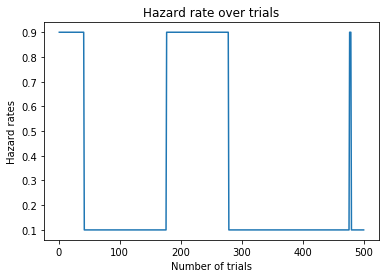

In [6]:
#Plotting hazard rate changes over the trials.
plt.title("Hazard rate over trials")
plt.xlabel("Number of trials")
plt.ylabel("Hazard rates")
m = np.arange(1, 501)
plt.plot(m, data['hazard'])
#plt.savefig('sim2_hazard_rate.png')

Plotting sound locations over number of trials.

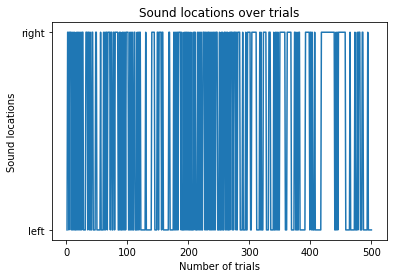

In [8]:
#Plotting sound locations over number of trials. 
plt.title("Sound locations over trials")
plt.xlabel("Number of trials")
plt.ylabel("Sound locations")
m = np.arange(1, 501)
plt.plot(m, data['sound'])

Plotting source locations over number of trials.

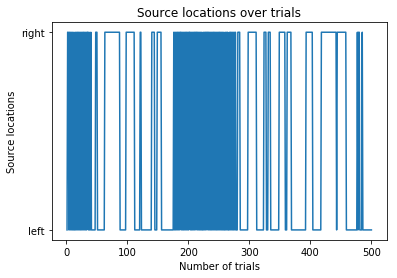

In [7]:
#Plotting source locations over number of trials. 
plt.title("Source locations over trials")
plt.xlabel("Number of trials")
plt.ylabel("Source locations")
m = np.arange(1, 501)
plt.plot(m, data['source'])

### Take aways & analysis
The effective hazard rate is related to how many times the sound locations switches from left to right and vice versa. 
The true hazard rate is related to how many times the source locations switches from left to right and vice versa. 
Due to the 80/20 noise aspect, the sound switches that constitute the effective hazard rate will match to the source switches will match %80 of the time, and %20 will not match causing the noise aspect.